## (nSN, zlim) metric

This metric is an estimate of the redshift limit z of a faint [(x1,color) = (-2.0,0.2)] supernovae and the number of medium supernovae ([(x1,color) = (0.0,0.0)]) with z<zlim


## Imports

In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import sqlite3
import numpy as np
from lsst.sims.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib notebook

## DB file choice

In [2]:
dbName = 'descddf_v1.4_10yrs'
dbFile = '/home/philippe/LSST/DB_Files/{}.db'.format(dbName)
#dbFile = dbName
opsimdb = db.OpsimDatabase(dbFile)
version = opsimdb.opsimVersion
#propinfo, proptags = opsimdb.fetchPropInfo()
#print('proptags and propinfo', proptags, propinfo)
runLength = opsimdb.fetchRunLength()

Cannot access Config table to retrieve runLength; using default 10 years


## Define slicer

In [3]:
slicer = slicers.HealpixSlicer(nside=64)


#ra = [20.]
#dec = [-50.]
#slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


## Metric instance

In [4]:
import healpy as hp
# metric instance
templateDir = 'reference_files_NSN_metric'
nside = 64
pixArea = hp.nside2pixarea(nside, degrees=True)
metric = SNNSNMetric(season=[-1], verbose=False, templateDir=templateDir,pixArea=pixArea, zlim_coeff=0.98)


### Make the bundle

In [5]:
bundleList = []

sql = ''
sql = '(note = "%s")' %('DD:COSMOS')
#sql += ' OR (note = "%s")' %('DD:ELAISS1')
#sql += ' OR (note = "%s")' %('DD:ECDFS')
#sql += ' OR (note = "%s")' %('DD:XMM-LSS')
#sql += ' OR (note = "%s")' %('DD:290')

print(sql)
bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=dbName))
print(len(bundleList))

(note = "DD:COSMOS")
1


In [6]:
outDir = '{}_NSN_zlim'.format(dbName)
resultsDb = db.ResultsDb(outDir=outDir)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint (note = "DD:COSMOS") for columns ['visitExposureTime', 'observationId', 'fieldDec', 'visitTime', 'fieldRA', 'fiveSigmaDepth', 'numExposures', 'observationStartMJD', 'night', 'filter']
Found 27245 visits
Running:  ['descddf_v1_4_10yrs_SNNSNMetric_note_DD_COSMOS_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "(note = "DD:COSMOS")" constraint now.


/home/philippe/LSST/nsn_zlim_maf/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


<IPython.core.display.Javascript object>


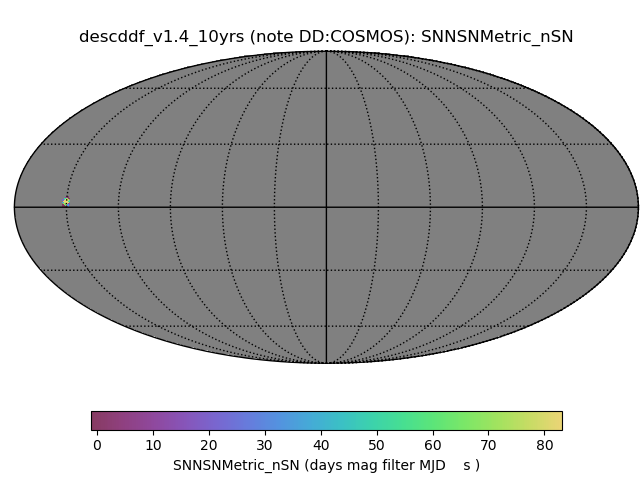

<IPython.core.display.Javascript object>


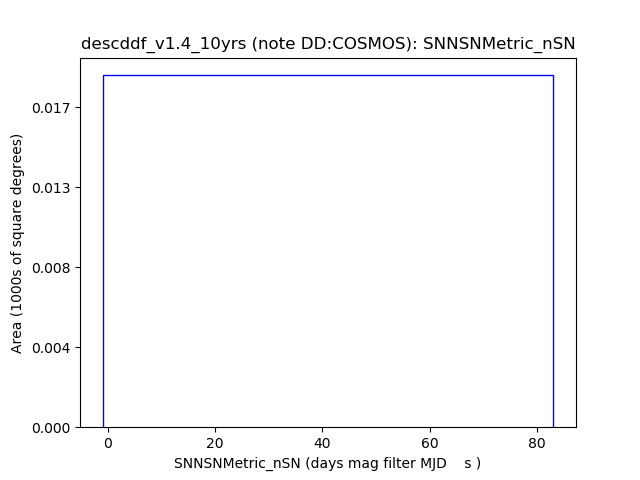

<IPython.core.display.Javascript object>


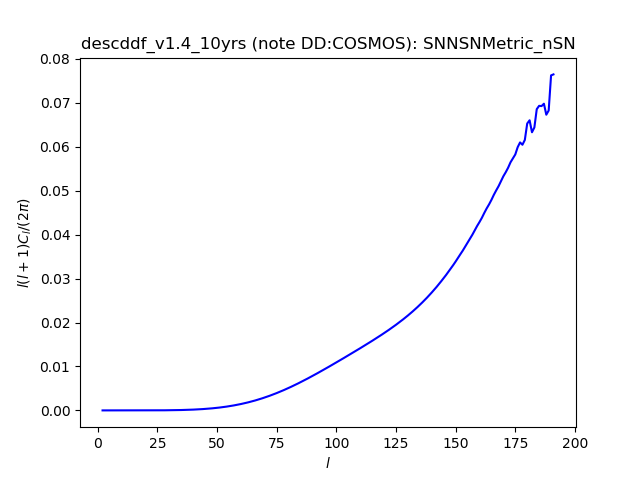

monopole: -125858  dipole: lon: 150.126, lat: 2.14923, amp: 125959


<IPython.core.display.Javascript object>


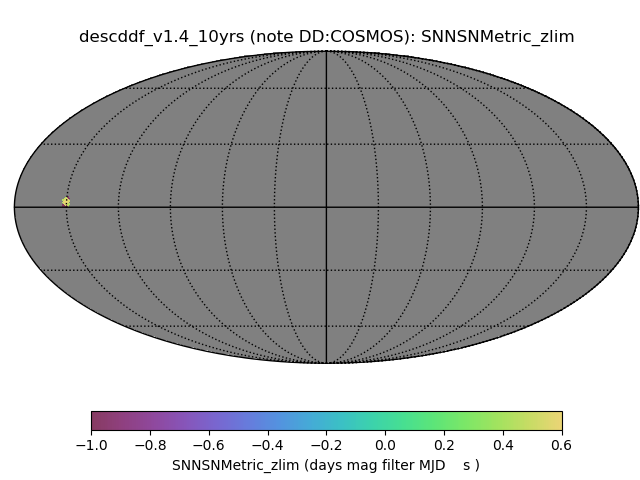

<IPython.core.display.Javascript object>


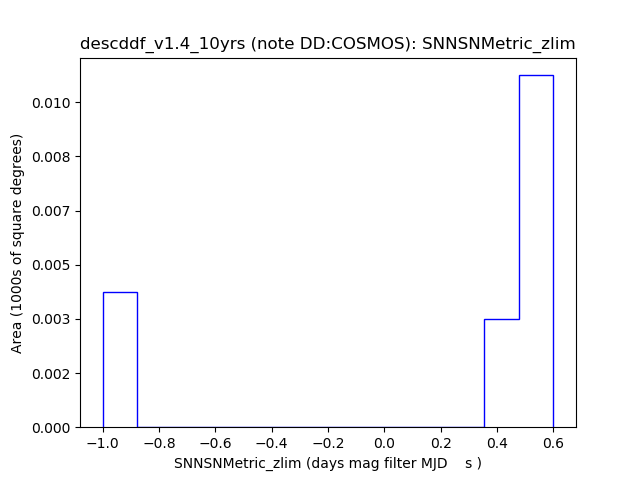

<IPython.core.display.Javascript object>


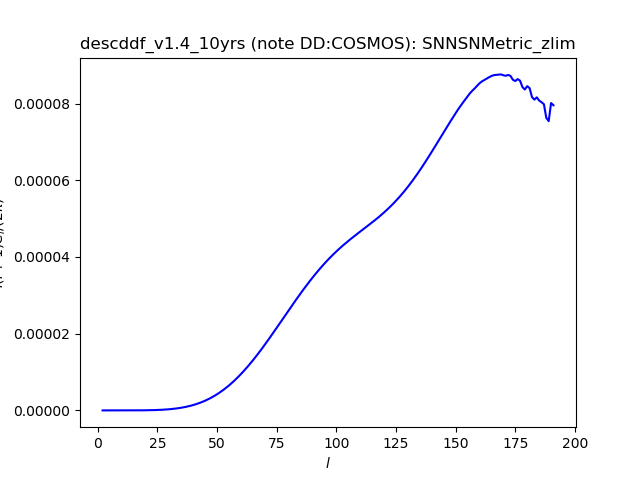

monopole: -1962.53  dipole: lon: 150.172, lat: 2.24229, amp: 1963.6
Plotting complete.


In [7]:
bgroup.plotAll(closefigs=False)
#import healpy as hp
#hp.mollview(bundleList[0].metricValues['nSN'])

In [8]:
bundleDict

{'descddf_v1_4_10yrs_SNNSNMetric_note_DD_COSMOS_HEAL': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7f4bcef8c210>,
 'SNNSNMetric_nSN': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7f4bceabb0d0>,
 'SNNSNMetric_zlim': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7f4bced19150>}

In [9]:
bundleDict['SNNSNMetric_nSN'].metricValues

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

<IPython.core.display.Javascript object>


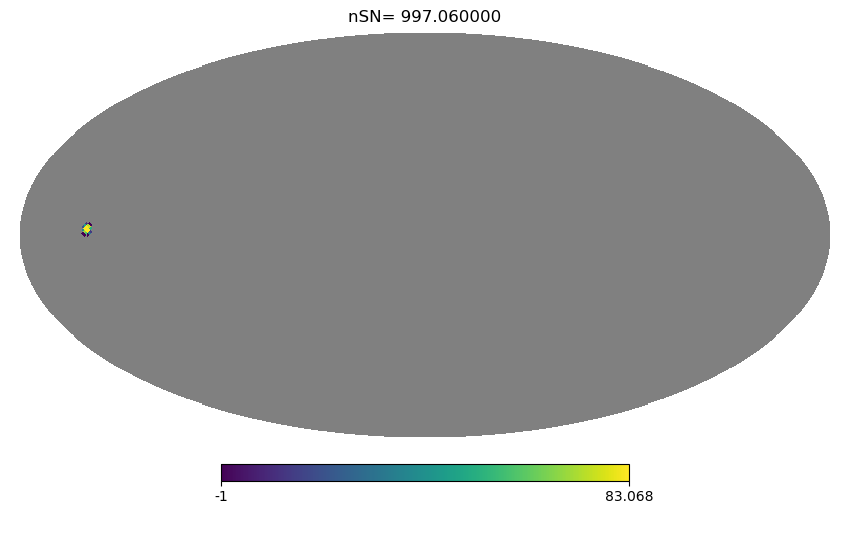

In [10]:
nSN = bundleDict['SNNSNMetric_nSN']
nSNValues = nSN.metricValues[~nSN.metricValues.mask]
nSNValues = nSNValues[nSNValues>-1]


hp.mollview(nSN.metricValues,title='nSN= %f' % np.sum(nSNValues))

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_w_2020_15/python/miniconda3-4.7.12/envs/lsst-scipipe-984c9f7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


<IPython.core.display.Javascript object>


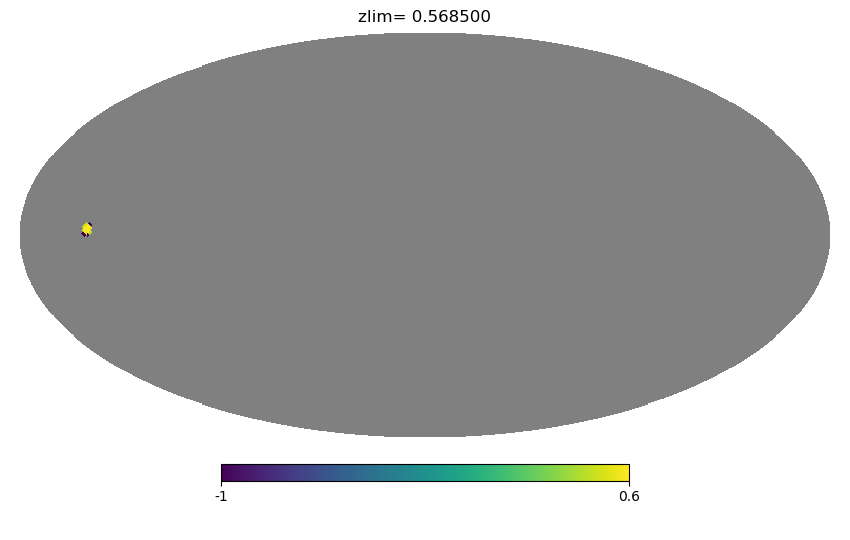

In [11]:
zlim = bundleDict['SNNSNMetric_zlim']
zlimValues = zlim.metricValues[~zlim.metricValues.mask]
zlimValues = zlimValues[zlimValues>-1]
hp.mollview(zlim.metricValues,title='zlim= %f' % np.median(zlimValues))

In [12]:
#bgroup.plotAll(closefigs=False)
#for vals in bundleList[0].metricValues:
#    print(vals)
restot = None
for val in bundleList:
    metValues = val.metricValues[~val.metricValues.mask]
    for vv in metValues:
        print(vv)
        if vv['nSN'] > 0.:
            if restot is None:
                restot = vv
            else:
                restot = np.concatenate((restot,vv))
                
#Now just make the plot manually
#print(restot.dtype)
#import healpy as hp
#hp.mollview(restot['nSN'],  title='sum= %f' % np.sum(restot['nSN']))

[(22762, 2.60163142, 0.07298144, 64, -1., -1.)]
[(22763, 2.62617511, 0.07298144, 64, 10.937, 0.427)]
[(23017, 2.58935957, 0.06254076, 64, -1., -1.)]
[(23018, 2.61390326, 0.06254076, 64, 72.467, 0.5685)]
[(23019, 2.63844696, 0.06254076, 64, 47.896, 0.5185)]
[(23274, 2.60163142, 0.05210691, 64, 78.051, 0.59)]
[(23275, 2.62617511, 0.05210691, 64, 83.068, 0.6)]
[(23276, 2.6507188, 0.05210691, 64, 20.295, 0.4445)]
[(23529, 2.58935957, 0.04167873, 64, 51.623, 0.5255)]
[(23275, 2.62617511, 0.05210691, 64, 83.068, 0.6)]
[(23531, 2.63844696, 0.04167873, 64, 82.604, 0.6)]
[(23786, 2.60163142, 0.03125509, 64, 82.776, 0.6)]
[(23275, 2.62617511, 0.05210691, 64, 83.068, 0.6)]
[(23788, 2.6507188, 0.03125509, 64, 39.935, 0.4875)]
[(24041, 2.58935957, 0.02083484, 64, 13.387, 0.426)]
[(23275, 2.62617511, 0.05210691, 64, 83.068, 0.6)]
[(24043, 2.63844696, 0.02083484, 64, 71.322, 0.5705)]
[(24298, 2.60163142, 0.01041686, 64, 34.394, 0.468)]
[(24299, 2.62617511, 0.01041686, 64, 59.101, 0.544)]
[(24300, 2.6

In [13]:
print('nSn',np.sum(restot['nSN']),'zlim',np.median(restot['zlim']))

nSn 997.06 zlim 0.5685
